##### Importing necessary libraries

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [327]:
# setting pandas options for wider range display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading the data and EDA

In [328]:
leads = pd.read_csv('Leads.csv')
# Display the first 20 rows of the DataFrame
leads.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [329]:
# inspecting the data types
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

- Here we see that majority of the variables are categorical and few are numaric

### checking for duplicate rows

In [330]:
# # Print the shape of the DataFrame before removing columns with only 1 value
# print("Shape before removing columns with only 1 value:", leads.shape)

# # Filter out columns with more than 1 unique value and update the DataFrame
# leads = leads.loc[:, leads.nunique() != 1]

# # Print the shape of the DataFrame after removing columns with only 1 value
# print("Shape after removing columns with only 1 value:", leads.shape)


5 columns have been removed which had only 1 value along all the rows

In [331]:
# dropping duplicate rows, if any
len(leads) - len(leads.drop_duplicates())

0

- We can see that there are no duplicate rows
- But now we shall have to look for missing values and its treatment

In [332]:
# primary check for presence of null values
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- There are so many null values
- Let us have a visual approach to clear our understanding about the current data in hand

__Dropping of unnecessary columns__

- The columns named Asymmetrique Activity Score and Asymmetrique Activity Index are very much related.
- Asymmetrique Activity Index is nothing but bucketing of the values of Asymmetrique Activity Score
- And same applies for Asymmetrique Profile Score and Asymmetrique Profile Index too
- Let's examine this and drop Asymmetrique Activity Index and Asymmetrique Profile Index

In [333]:
import csv

# File path for the CSV file
csv_file_path = 'columns.csv'

# Sort the column names in ascending order
sorted_columns = sorted(leads.columns)

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write the sorted column names to the CSV file
    for column_name in sorted_columns:
        csv_writer.writerow([column_name])

print(f"CSV file containing sorted column names has been created: {csv_file_path}")


CSV file containing sorted column names has been created: columns.csv


In [334]:
table1 = leads[['Asymmetrique Activity Score','Asymmetrique Activity Index']].groupby('Asymmetrique Activity Index')
table1.describe()

Asymmetrique Activity Score                       \
                                                  count       mean       std   
Asymmetrique Activity Index                                                    
01.High                                           821.0  16.437272  0.508488   
02.Medium                                        3839.0  14.134931  0.721534   
03.Low                                            362.0  11.290055  0.927488   

                                                           
                              min   25%   50%   75%   max  
Asymmetrique Activity Index                                
01.High                      16.0  16.0  16.0  17.0  18.0  
02.Medium                    13.0  14.0  14.0  15.0  15.0  
03.Low                        7.0  11.0  12.0  12.0  12.0

In [335]:
table2 = leads[['Asymmetrique Profile Score','Asymmetrique Profile Index']].groupby('Asymmetrique Profile Index')
table2.describe()

Asymmetrique Profile Score                       \
                                                count       mean       std   
Asymmetrique Profile Index                                                   
01.High                                        2203.0  18.128007  0.957760   
02.Medium                                      2788.0  14.987446  0.767234   
03.Low                                           31.0  11.709677  0.461414   

                                                          
                             min   25%   50%   75%   max  
Asymmetrique Profile Index                                
01.High                     17.0  17.0  18.0  19.0  20.0  
02.Medium                   13.0  15.0  15.0  15.0  16.0  
03.Low                      11.0  11.0  12.0  12.0  12.0

- Now as we have confirmation (from the min vale and max value we get the range and they are seperated) from the above 2 tables that the Indexes and Score  are carring same information so one of each may be dropped, we can drop the Score columns

In [336]:
leads_2=leads.copy()
leads_2=leads_2.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score'], axis=1)

Prospect ID has no significance in this analysis, so let us drop this

In [337]:
leads_2 = leads_2.drop('Prospect ID',axis=1)

__Now, let us define a fuction to check the data quality of a particular column__

In [338]:
def column_dataQuality(leads,column):
    print(leads[column].unique(),'\n')
    print('Null value percentage: ',leads[column].isna().sum()*100/len(leads[column]),'\n')
    print(leads[column].describe())

In [339]:
column_dataQuality(leads_2,'What matters most to you in choosing a course')

['Better Career Prospects' nan 'Flexibility & Convenience' 'Other'] 

Null value percentage:  29.318181818181817 

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object


'What matters most to you in choosing a course' column has only 3 unique values and 29.3% missing value, so there is no need of keeping this

In [340]:
leads_2 = leads_2.drop('What matters most to you in choosing a course',axis=1)

In [341]:
column_dataQuality(leads_2,'How did you hear about X Education')

['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS'] 

Null value percentage:  23.885281385281385 

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object


This also has so many missing values, and it does not look so important factor. So, let us drop this

In [342]:
leads_2 = leads_2.drop('How did you hear about X Education',axis=1)

In [343]:
column_dataQuality(leads_2,'Specialization')

['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business'] 

Null value percentage:  15.562770562770563 

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object


In [344]:
column_dataQuality(leads_2,'Lead Quality')

['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance'] 

Null value percentage:  51.59090909090909 

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object


In [345]:
column_dataQuality(leads_2,'Tags')

['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized'] 

Null value percentage:  36.28787878787879 

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object


In [346]:
column_dataQuality(leads_2,'Last Activity')

['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam'] 

Null value percentage:  1.1147186147186148 

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


This column has 19 unique values and missing percentage is also not that high. So, let's not drop this

In [347]:
column_dataQuality(leads_2,'Country')

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia'] 

Null value percentage:  26.634199134199132 

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object


In [348]:
leads_2['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [349]:
# as we can see that most of the values are 'India', we can impute the missing values with 'India'
leads_2.loc[pd.isnull(leads_2['Country']), ['Country']] = 'India'
column_dataQuality(leads_2,'Country')

['India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates' 'United States'
 'Australia' 'United Kingdom' 'Bahrain' 'Ghana' 'Singapore' 'Qatar'
 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China' 'Canada'
 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia'] 

Null value percentage:  0.0 

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object


In [350]:
# Now we shall categorie it in 2 values, 'India' and 'Out side India'
leads_2['Country'] = leads_2['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads_2['Country'].value_counts()

Country
India            8953
Outside India     287
Name: count, dtype: int64

### Missing value and null value treatment

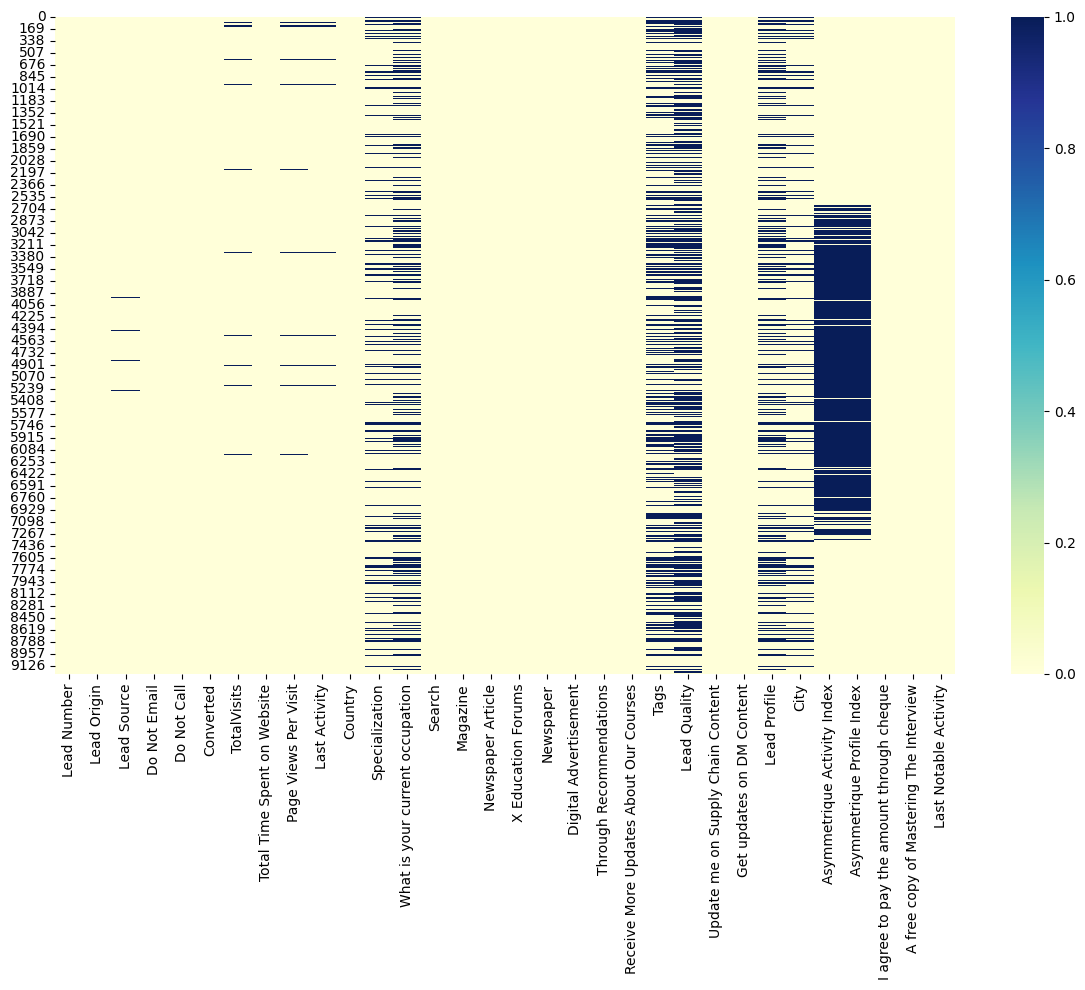

In [351]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

There are many missing value present, so it needs to be treated

'Asymmetrique Profile Score' and 'Asymmetrique Activity Score' have so many missing values. Let us impute those with mean value as there is no chance of having outliers in this case

In [352]:
leads_2.nunique()

Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Country                                        2
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

In [353]:
leads_2['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [354]:
# from the heat map we can see that 'Lead Source' has very less missing values. 
#So let us impute them with 'Google' as it has occured many a times
leads_2.loc[pd.isnull(leads_2['Lead Source']), ['Lead Source']] = 'Google'

In [355]:
column_dataQuality(leads_2,'TotalVisits')

[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 

Null value percentage:  1.4826839826839826 

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [356]:
# As it is taking integer values, and only 1.4 % missing values
# Let us impute this with median
leads_2['TotalVisits'].replace(np.NaN, leads_2['TotalVisits'].median(), inplace =True)

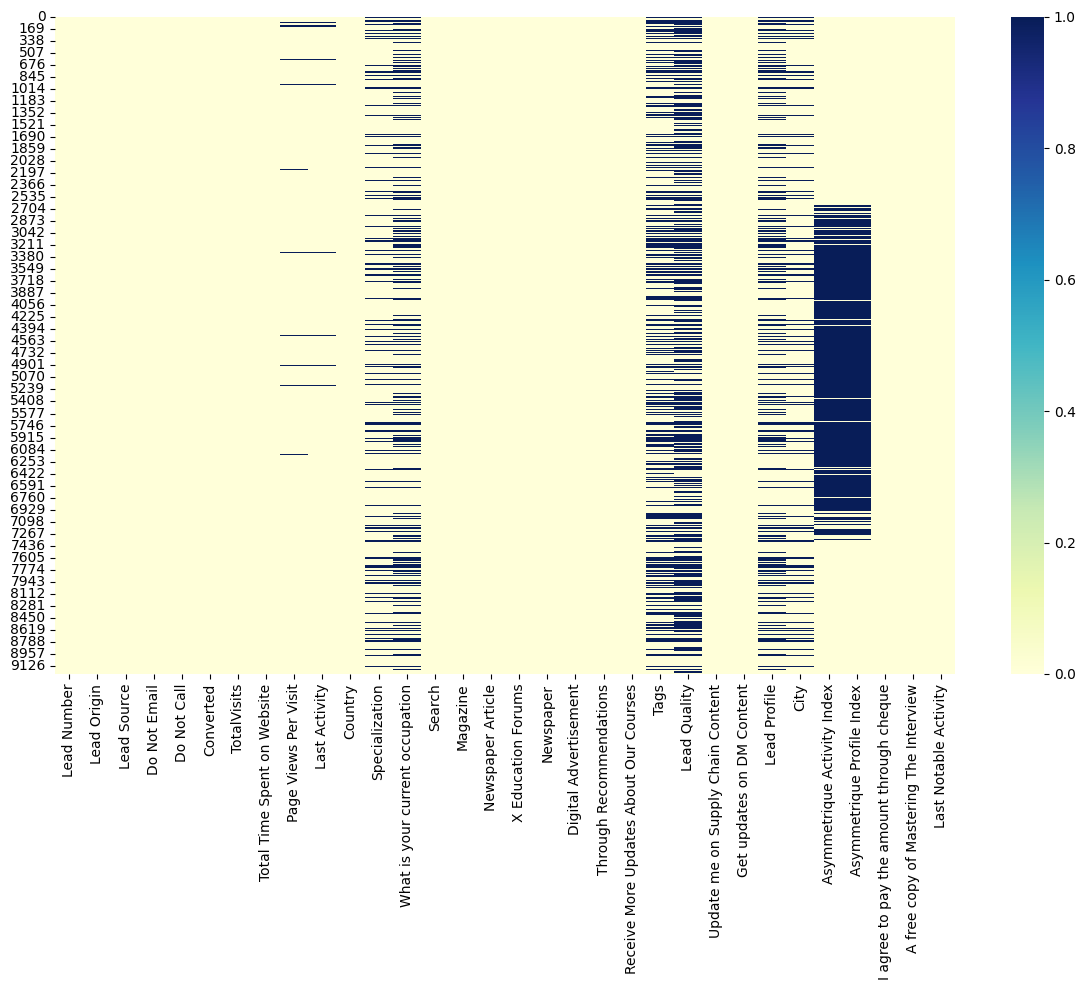

In [357]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [358]:
column_dataQuality(leads_2,'Page Views Per Visit')

[ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.
  3.75  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5
  3.8   1.19  3.82  2.83  1.93 11.5   2.08] 

Null value percentage:  1.4826839826839826 

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


In [359]:
leads_2['Page Views Per Visit'].mode()

0    0.0
Name: Page Views Per Visit, dtype: float64

In [360]:
# As the null value percentage is very less, let us impute these with mode
leads_2['Page Views Per Visit'].replace(np.NaN, 0.0, inplace =True)

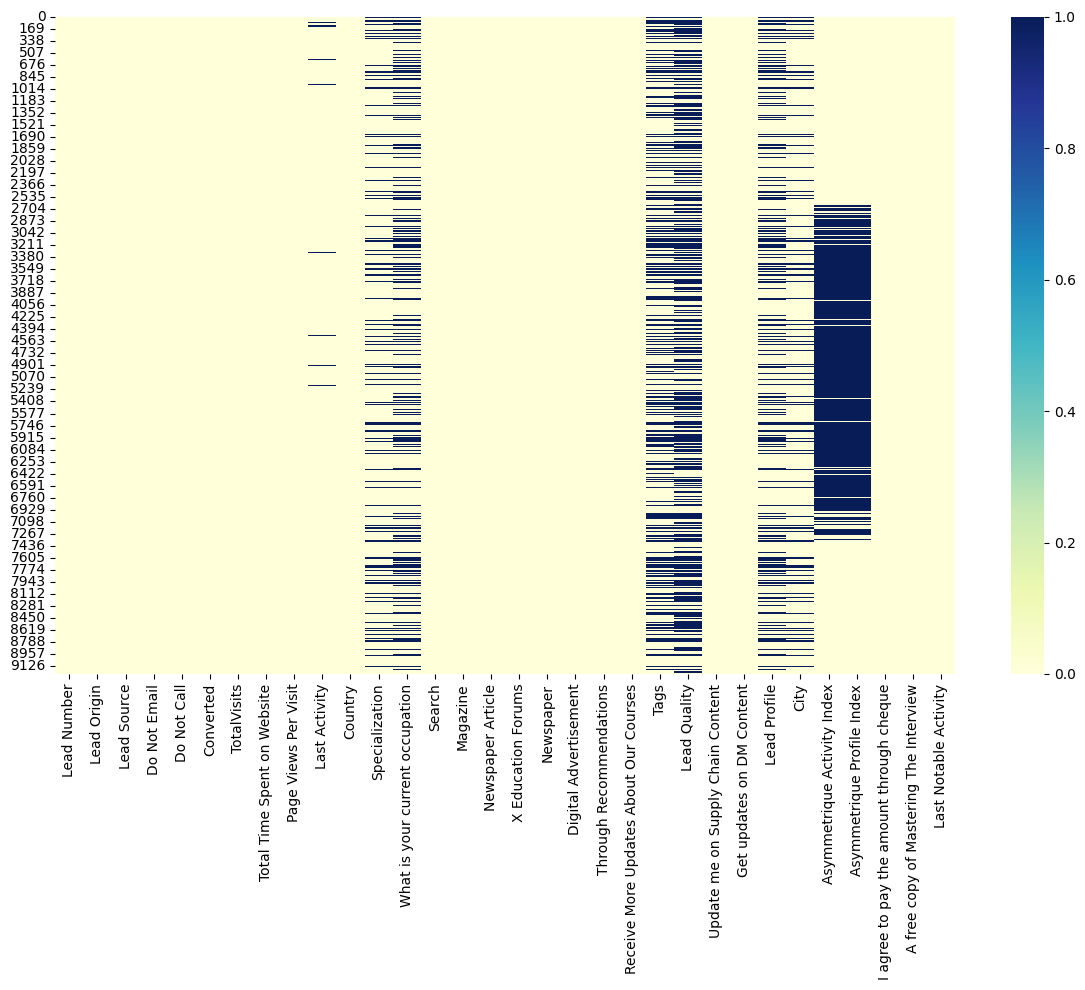

In [361]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [362]:
leads_2['Page Views Per Visit'].isna().sum()

0

In [363]:
# from above distributions it is seen that  missing values for 'Last Activity' better not to fillup with above category values
# because that may effect result,so, all those missing values may be given  a separate new value as 'Not_mentioned'.
# similar action also may be taken for 'Specialization','Tags','What is your current occupation','Lead Quality','Lead Profile','City','Asymmetrique Activity Index', 'Asymmetrique Profile Index'.
# 'Asymmetrique Activity Index'and 'Asymmetrique Profile Index'
lst_nm=['Last Activity','Tags','Specialization','What is your current occupation','Lead Quality','Lead Profile','City','Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [364]:
for i in range (0,len(lst_nm)):
                leads_2[lst_nm[i]].fillna("not_mentioned", inplace = True)

## Barplots to visualize population of different row values of categorical coloums.

In [365]:
lst_br1=[ 'What is your current occupation','Lead Quality','Lead Profile','City','Asymmetrique Activity Index', 'Asymmetrique Profile Index']
lst_br=lst_br1
def plot_bar(leads):
    columns=lst_br
    plt.figure(figsize=(20,40))
    for var in columns:
        plt.subplot(5,2,columns.index(var)+1)
        sns.barplot(y=var, x='Converted', palette='husl', data=leads, estimator=np.sum)
    
    plt.show()

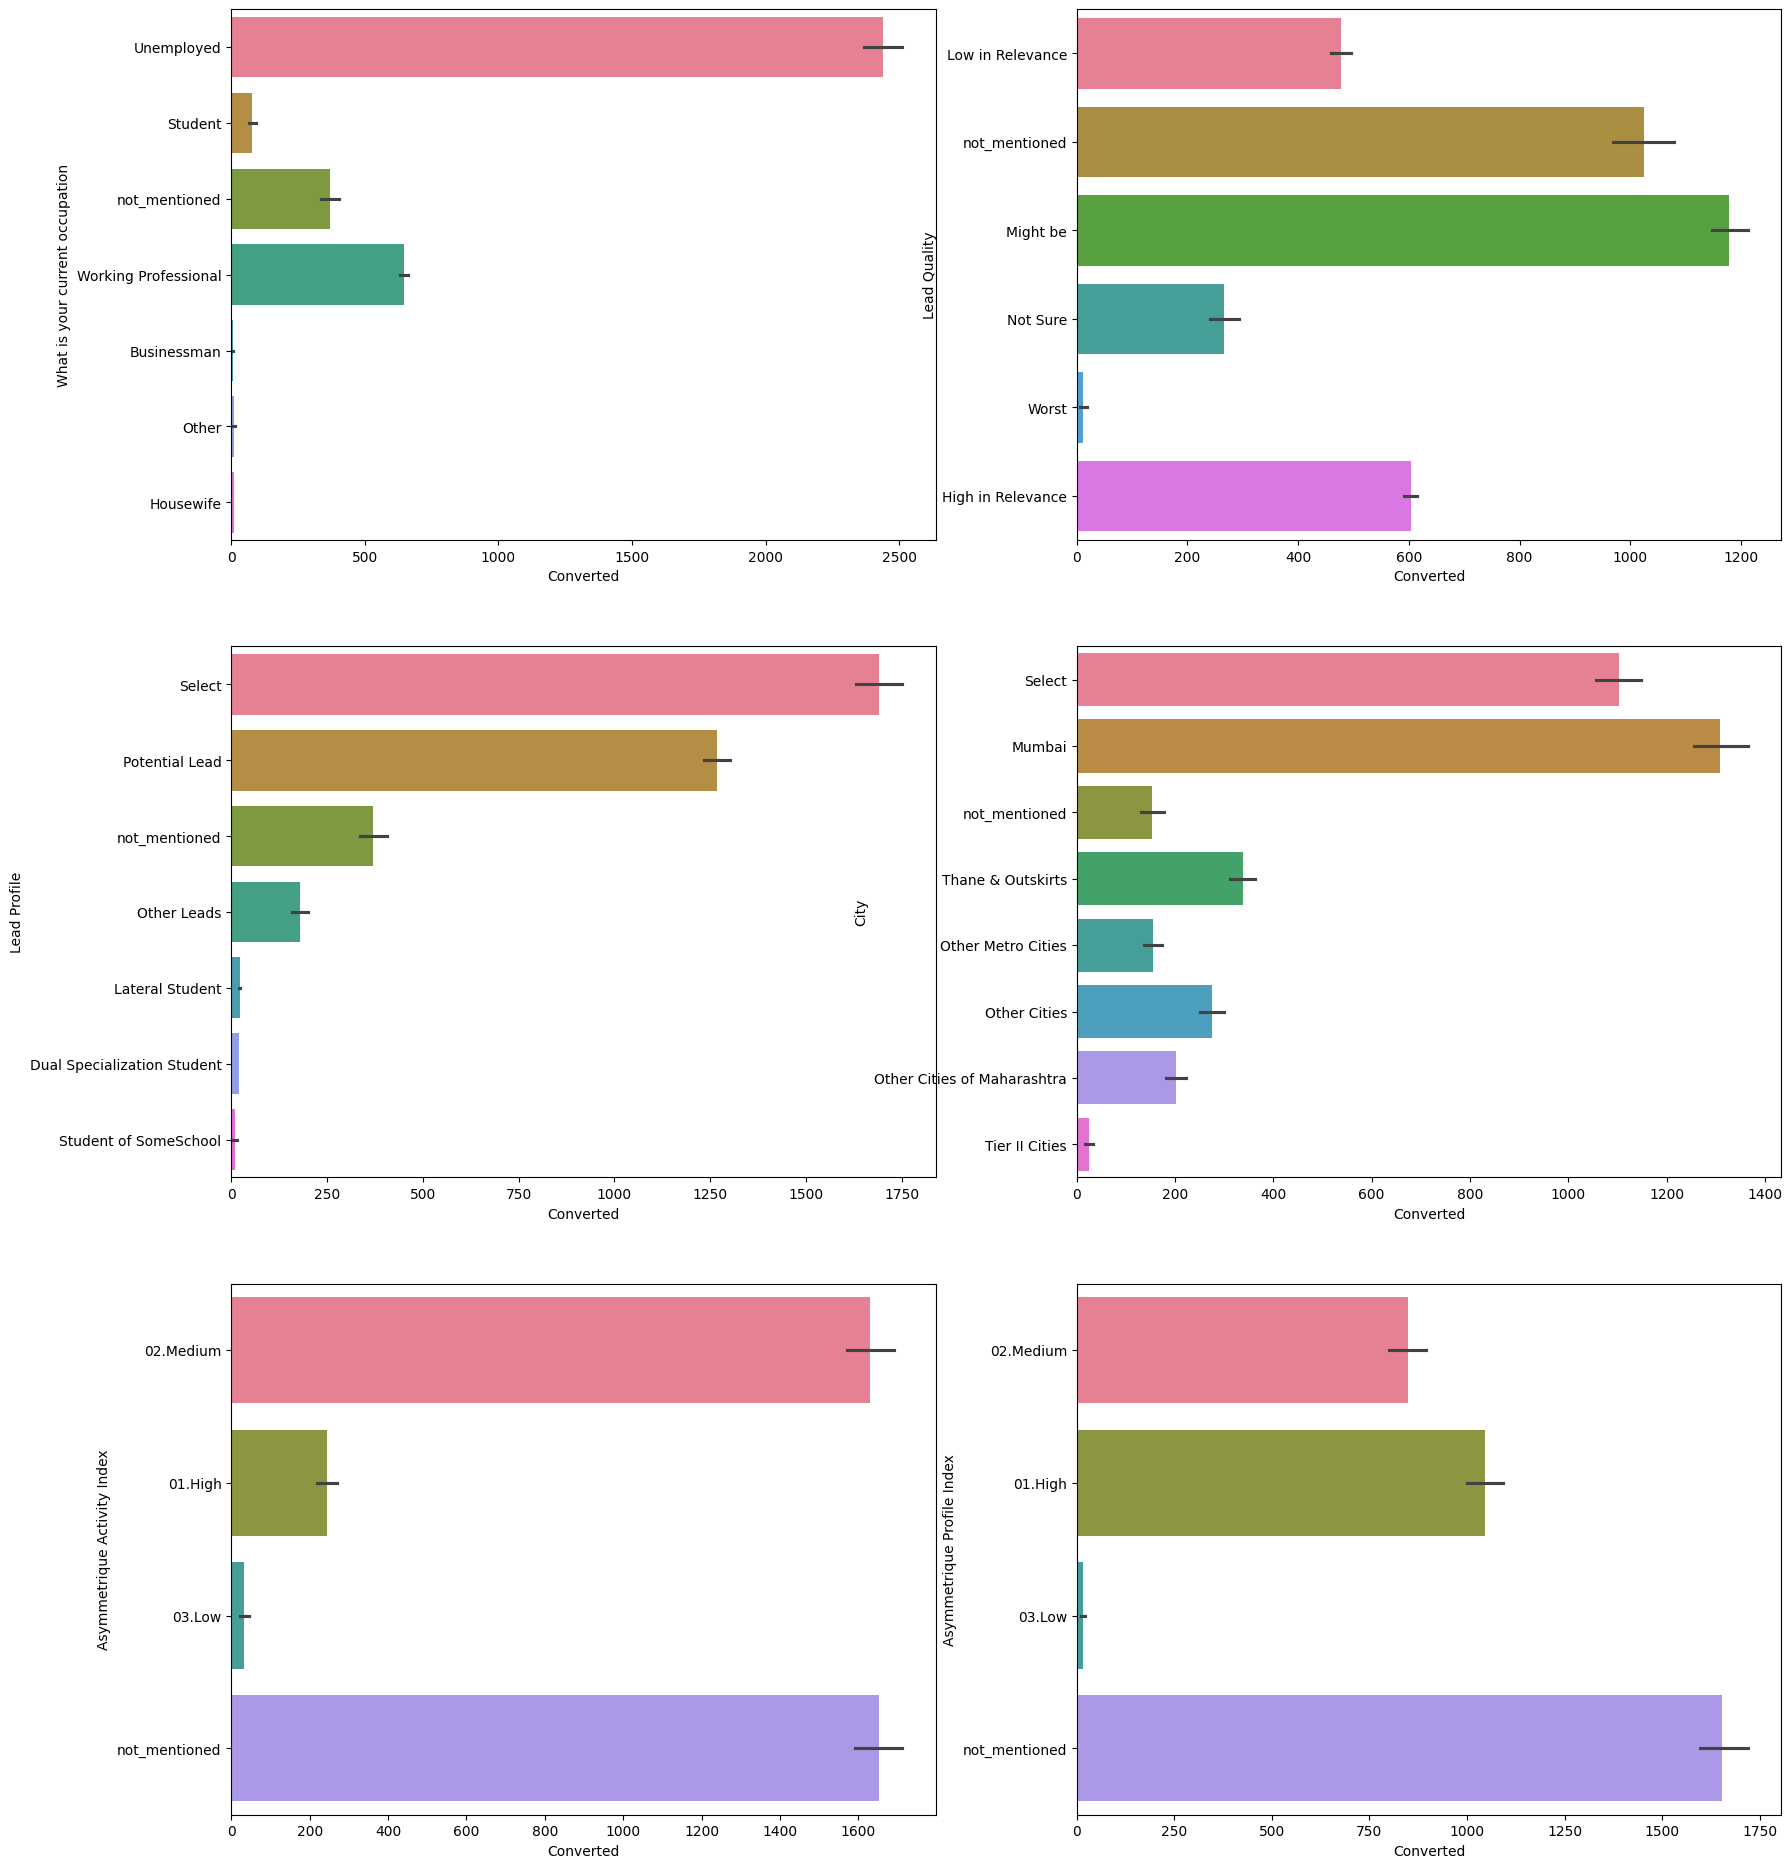

In [366]:
plot_bar(leads_2)

In [367]:
# in 'Lead profile' and 'City' have a value as 'Select'. This might have happened in the website where there  might be 
#   a'Select' non mandatory drop downs option and few customer failed  to opt.So, those also are to be be replaced.
leads_2['Lead Profile'].replace('Select', 'not_mentioned', inplace =True)
leads_2['City'].replace('Select', 'not_mentioned', inplace =True)

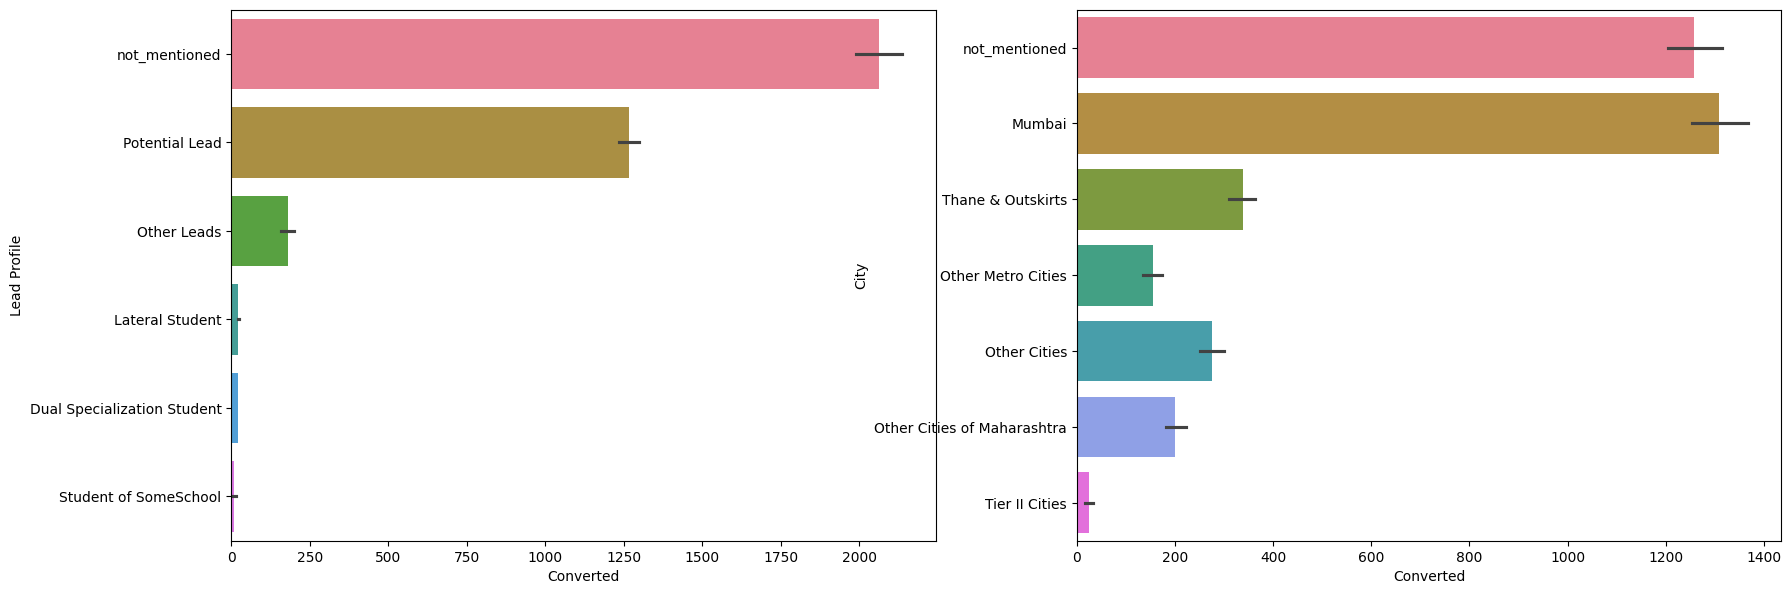

In [368]:
lst_br2=['Lead Profile','City']
lst_br=lst_br2
plot_bar(leads_2)

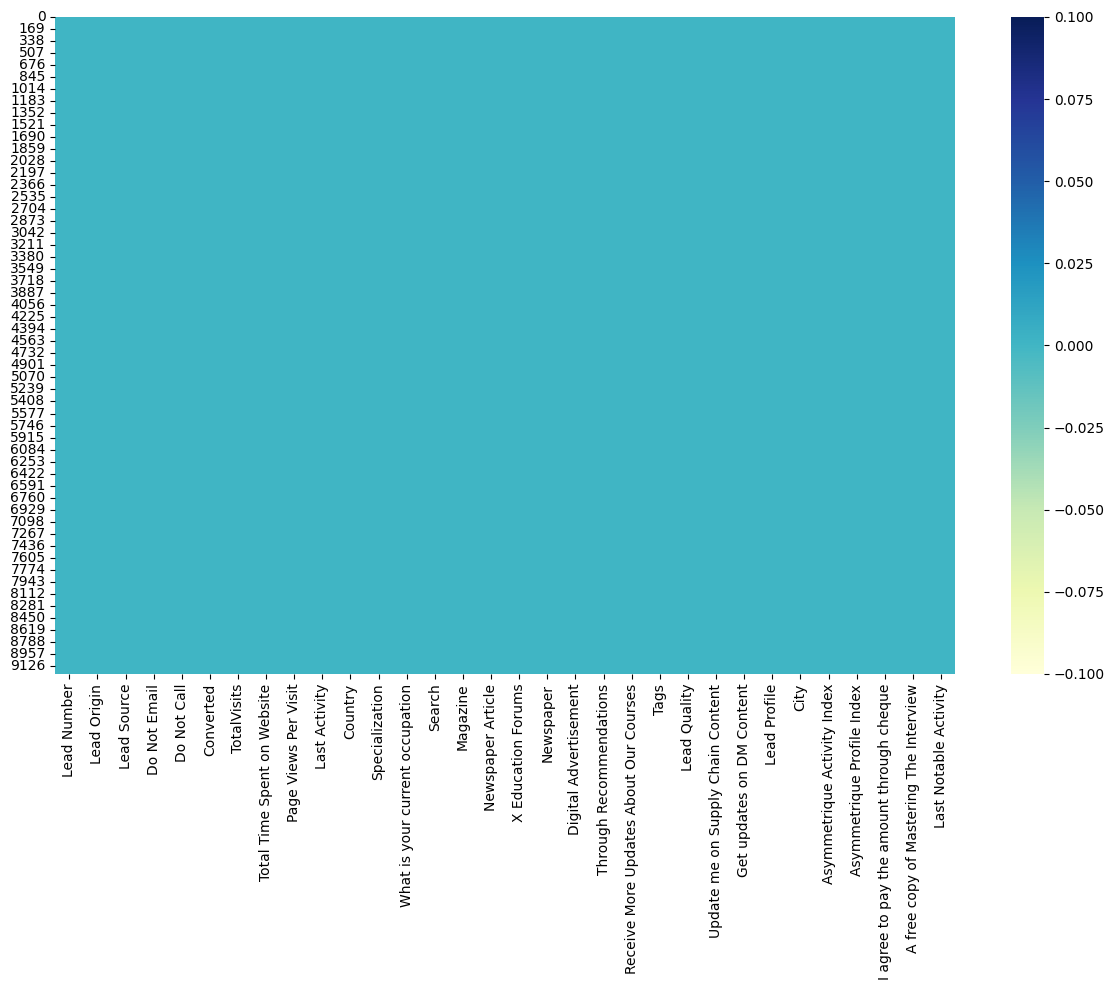

In [369]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [370]:
# Checking stastical values of different features at 25%,50%,75%,90%,95% and 99%
leads_2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.327787
std,23405.995698,0.486714,4.819024,548.021466,2.164258
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### Checking outliers:
-To vesualize outliers we can draw different plots.

In [371]:
# dist plots to check outliers
# creating a custom function for dist plot
lst=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
def plot_box(leads):
    columns=lst
    plt.figure(figsize=(15, 6))
    for var in columns:
        plt.subplot(1,3,columns.index(var)+1)
        sns.boxplot(y = var, data = leads)
    plt.show()

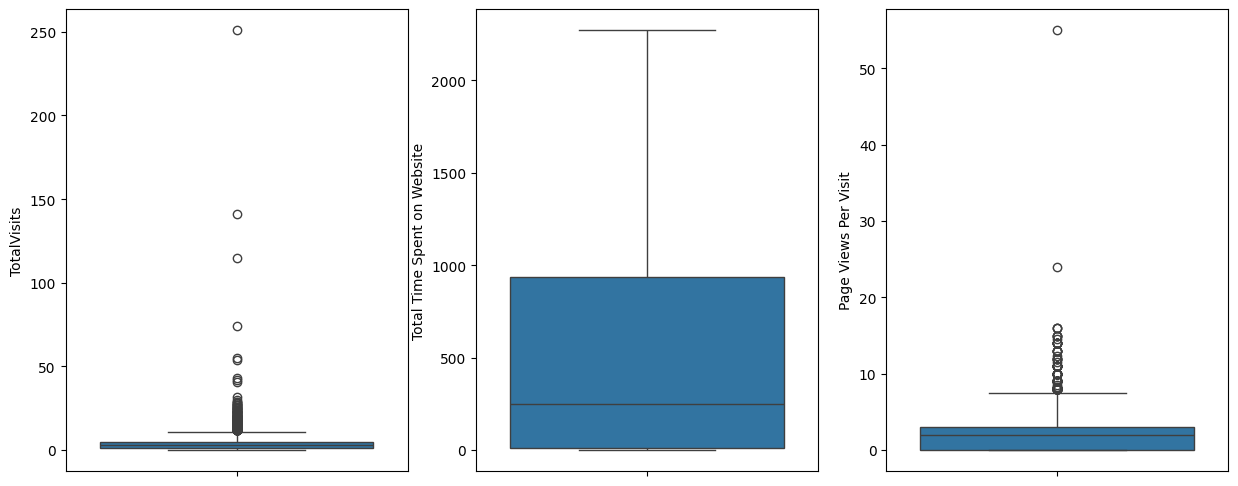

In [372]:
plot_box(leads_2)

In [373]:
def plot_dist(leads):
    columns=lst
    plt.figure(figsize=(20, 6))
    for var in columns:
        plt.subplot(1,3,columns.index(var)+1)
        sns.distplot(leads[var])
    plt.show()

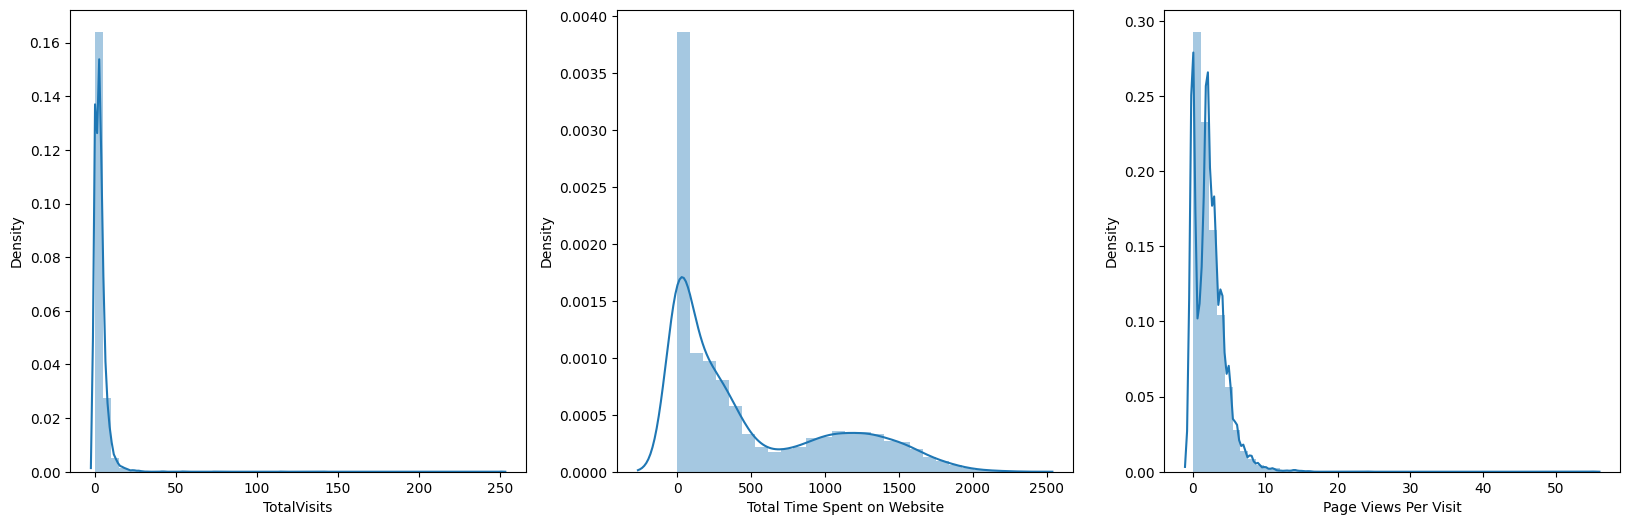

In [374]:
plot_dist(leads_2)

- plots show outlayers in TotalVisits,Page Views Per Visit,
- plots "Views vs Time Spent " and "TotalVisits & Time Spent " may be drawn

In [375]:
lst_s=['Page Views Per Visit','TotalVisits']
def plot_sc(leads,xv):   
    columns=lst_s  
    plt.figure(figsize=(10,10))
    for var in columns:
        plt.subplot(2, 1,columns.index(var)+1)
        sns.scatterplot(y=xv,x=var,legend='full',data=leads)
        plt.tight_layout()
    plt.show()

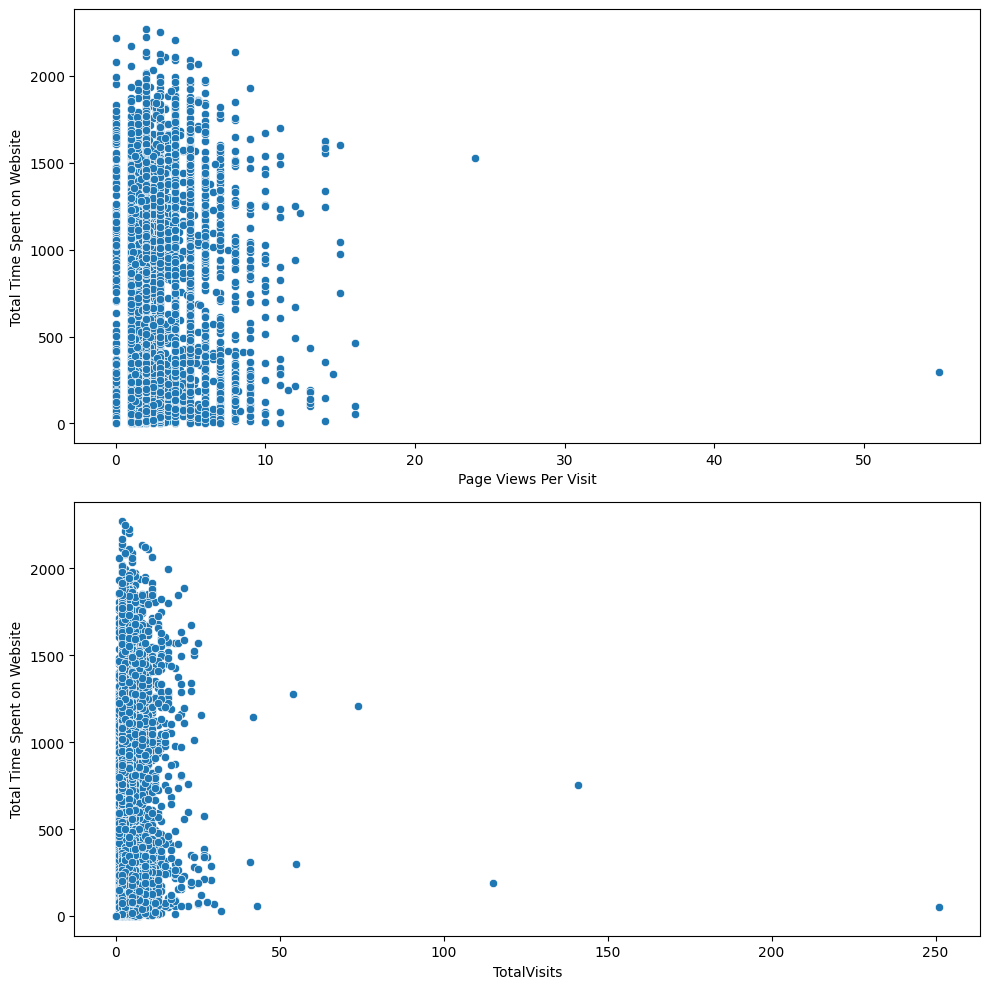

In [376]:
plot_sc(leads_2,'Total Time Spent on Website')

In [377]:
# Checking stastical values of different features at 25%,50%,75%,90%,95% and 99%
leads_2.describe(percentiles=[.05,0.1,.25,.5,.75,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.327787
std,23405.995698,0.486714,4.819024,548.021466,2.164258
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000


In [378]:
# we may treat outliers by  by clipping the values of these variables outside of these percentile values of 95% .

leads_2['TotalVisits'][(leads_2['TotalVisits']>10)] =10
leads_2['Page Views Per Visit'][(leads_2['Page Views Per Visit']>6)] =6

leads_2.shape

(9240, 32)

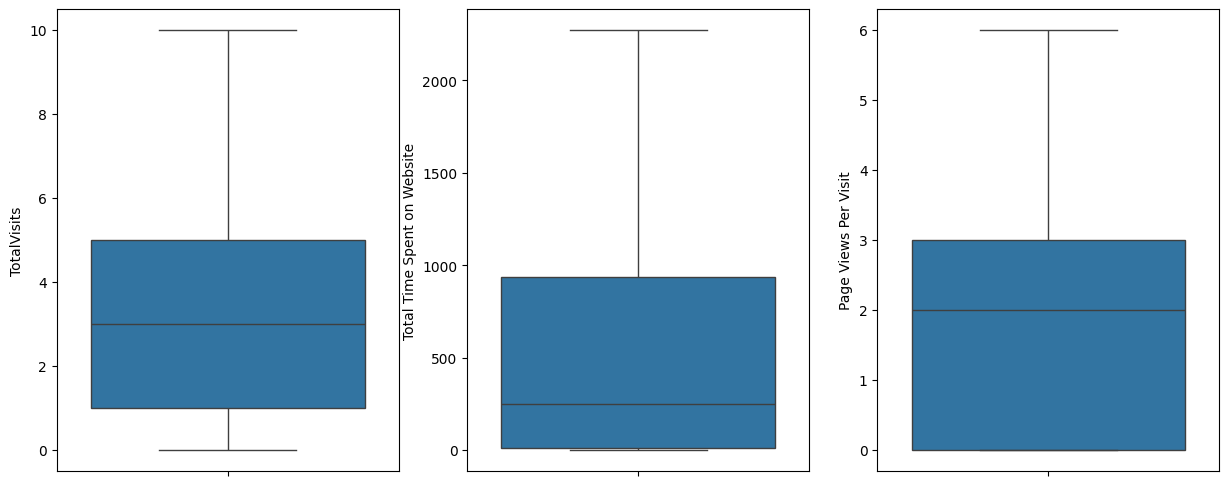

In [379]:
plot_box(leads_2)

In [380]:
lst_1=[]
lst_2=[]
lst_3=[]
lst_4=[]
lst_u=leads_2.columns
ln_d=len(lst_u)
for i in range(0,ln_d) :
    if leads_2[lst_u[i]].dtype=='object' :
        if leads_2[lst_u[i]].nunique()==2:
            lst_1.append (lst_u[i])
        else:
            lst_2.append (lst_u[i])
    else:
        if leads_2[lst_u[i]].nunique()==2:
            lst_3.append (lst_u[i])
        else:
            lst_4.append (lst_u[i])
   
            
print(len(lst_1),len(lst_2),len(lst_3),len(lst_4),)

10 17 1 4


In [381]:
 print("-columns with numaric data with more than two values-",lst_4 , "and one binary column--", lst_3,)

-columns with numaric data with more than two values- ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] and one binary column-- ['Converted']


In [382]:
print(lst_1)

['Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


- From lst_1 we see that ten columns are with binary values,nine with 'Yes'/'No' . so those can be converted with binary values as 1/0 . but 'Country' with 'India'/"Outside_India" to be treated separately lt us drop it from lst_1 and append to lst_2.

In [383]:
lst_1.remove('Country')
lst_2.append('Country')
print(lst_2)
print(lst_1)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Magazine', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'Last Notable Activity', 'Country']
['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


In [384]:
# converting columns in lst_1 into binary 1 / 0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_2[lst_1] = leads_2[lst_1].apply(binary_map)

In [385]:
leads_2.shape 

(9240, 32)

- From lst_2 we see that 13 colums have multiple categorical variables, we can create  dummy variables for each of these  variables and concatanet with main dataframe 'leads_2'. after concatination the the columns with these 13 main variables should be dropped out to avoid duplication and thus the dataframe will not contain any categorical variable.

In [386]:
print (lst_nm)

['Last Activity', 'Tags', 'Specialization', 'What is your current occupation', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [387]:
# we define a list 
lst_wm=['Country', 'Lead Source','Lead Origin','Last Notable Activity']
# columns of abobe list members  donot contain  a value named "not_mentioned" 
# but columns in 'lst_nm' contain  it so these two lists  will be treated and  separately,

# Creating a dummy variable for  categorical variables in lst_wm and dropping the first one.
dummy1 = pd.get_dummies(leads_2[lst_wm], drop_first=True)
# Adding the results to the master dataframe
leads = pd.concat([leads_2, dummy1], axis=1)
leads.shape


(9240, 72)

In [388]:
# Creating dummy variables for the remaining categorical variables
# and dropping the level called 'Unknown' which represents null/select values.
for i in range(0, len(lst_nm)):
    x = lst_nm[i]
    y = x + '_not_mentioned'
    ml = pd.get_dummies(leads_2[x], prefix=x)
    
    # Dropping the level called 'not_mentioned' which represents null/select values    
    ml1 = ml.drop(columns=[y])
    
    # Adding the results to the master dataframe
    leads_2 = pd.concat([leads_2, ml1], axis=1)

leads_2.shape

(9240, 122)

In [389]:
leads = leads.drop(columns=['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                             'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 
                             'Country','Lead Source','Last Notable Activity'], axis=1)
leads.shape


(9240, 59)

In [390]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,660728,0,0,0,5.0,674,2.5,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,660727,0,0,1,2.0,1532,2.0,0,No,0,0,0,0,0,No,No,No,No,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,0,1.0,305,1.0,0,No,0,0,0,0,0,No,No,No,No,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,660681,0,0,1,2.0,1428,1.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [391]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine',
 'I agree to pay the amount through cheque']

In [392]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(9240, 59)
(9240, 59)


### Test-Train Split

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,0,No,0,0,0,0,0,No,No,No,No,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,0,No,0,0,0,0,0,No,No,No,No,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [395]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [396]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [397]:
from sklearn.preprocessing import StandardScaler

In [398]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6795,0,0,0.299722,0.005716,-0.493295,0,No,0,0,0,0,0,No,No,No,No,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3516,0,0,0.662077,-0.691418,0.158918,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8105,0,0,0.662077,1.365219,1.552535,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3934,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [411]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6795,0,0,0.299722,0.005716,-0.493295,0,No,0,0,0,0,0,No,No,No,No,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3516,0,0,0.662077,-0.691418,0.158918,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8105,0,0,0.662077,1.365219,1.552535,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3934,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [414]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your DataFrame
label_encoder = LabelEncoder()

# Iterate over each column and encode categorical variables
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Check if the column contains categorical data
        X_train[column] = label_encoder.fit_transform(X_train[column])

# Now X_train contains the label encoded values


In [413]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,8.0,1011,6.0,0,No,0,0,0,0,0,No,No,No,No,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2376,0,0,0.0,0,0.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7766,0,0,5.0,59,5.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9199,0,0,0.0,0,0.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4359,0,0,0.0,0,0.0,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [412]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [399]:
X_train.describe()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-5.108262e-17,-6.701161e-17,-9.886958e-18,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843
std,0.268799,0.017583,1.000077e+00,1.000077e+00,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282
min,0.000000,0.000000,-1.149699e+00,-8.853708e-01,-1.234699e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.873438e-01,-8.634138e-01,-1.234699e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-6.263344e-02,-4.352528e-01,-1.198054e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,6.620769e-01,8.098906e-01,4.376415e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,2.473853e+00,3.271816e+00,2.109982e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the Lead Conversion Rate

In [400]:

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

### Model Building:
Let's start by splitting our data into a training set and a test set and runn First Training Model

In [401]:
import statsmodels.api as sm

In [402]:
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6795,0,0,0.299722,0.005716,-0.493295,0,No,0,0,0,0,0,No,No,No,No,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3516,0,0,0.662077,-0.691418,0.158918,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8105,0,0,0.662077,1.365219,1.552535,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3934,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
79,0,0,-0.062633,0.404601,-1.234699,0,No,0,0,0,0,0,No,No,No,No,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8039,0,0,-1.149699,-0.885371,-1.234699,0,No,0,0,0,0,0,No,No,No

In [406]:
# import numpy as np

# # Convert pandas DataFrames to numpy arrays
# X_train_np = np.asarray(X_train)
# y_train_np = np.asarray(y_train)

# # Fit the logistic regression model
# logm1 = sm.GLM(y_train_np, sm.add_constant(X_train_np), family=sm.families.Binomial())
# result = logm1.fit()

# # Display the summary
# print(result.summary())


### Feature Selection Using RFE

In [407]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [410]:
from sklearn.feature_selection import RFE

# Assuming logreg is your logistic regression estimator
rfe = RFE(estimator=logreg, n_features_to_select=20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)


ValueError: could not convert string to float: 'No'

In [ ]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False,

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('Do Not Call', False, 87),
 ('TotalVisits', False, 57),
 ('Total Time Spent on Website', False, 10),
 ('Page Views Per Visit', False, 58),
 ('Search', False, 43),
 ('Newspaper Article', False, 107),
 ('X Education Forums', False, 97),
 ('Newspaper', False, 94),
 ('Digital Advertisement', False, 56),
 ('Through Recommendations', False, 115),
 ('A free copy of Mastering The Interview', False, 78),
 ('Country_Outside India', False, 116),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 117),
 ('Lead Source_NC_EDM', False, 42),
 ('Lead Source_Olark Chat', False, 67),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 119),
 ('Lead Source_Press_Release', False, 102),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Social Media', False, 85),
 ('Lead Source_WeLearn', False, 11

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Asymmetrique Activity Index_01.High',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_01.High',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low'],
      dtype='object', length=122)

### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1355.6
Date:                Mon, 18 Nov 2019   Deviance:                       2711.2
Time:                        18:03:03   Pearson chi2:                 9.69e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5291      0.088    -28.627      0.000      -2.702      -2.356
Lead Source_Welingak Website                             2.9865      0.732      4.078      0.000       1.551       4.422
Last Activity_SMS Sent                                   2.0447      0.110     18.547      0.000       1.829       2.261
Tags_Already a student                                  -4.1535      0.729     -5.697      0.000      -5.582      -2.725
Tags_Closed by Horizzon                                  5.8799      1.010      5.820      0.000       3.900       7.860
Tags_Diploma holder (Not Eligible)                     -23.6349   1.73e+04     -0.001      0.999    -3.4e+04    3.39e+04
Tags_Interested  in full time MBA                       -3.4595      0.745     -4.646      0.000      -4.919      -2.000
Tags_Interested in other courses                        -3.2033      0.327     -9.799      0.000      -3.844      -2.563
Tags_Lost to EINS                                        6.2696      0.784      7.994      0.000       4.732       7.807
Tags_Not doing further education                        -4.0374      1.029     -3.923      0.000      -6.054      -2.020
Tags_Ringing                                            -4.3930      0.232    -18.940      0.000      -4.848      -3.938
Tags_Will revert after reading the email                 3.4000      0.183     18.562      0.000       3.041       3.759
Tags_invalid number                                     -4.6744      1.025     -4.558      0.000      -6.684      -2.665
Tags_number not provided                               -24.9561   2.58e+04     -0.001      0.999   -5.05e+04    5.05e+04
Tags_opp hangup                                         -2.9502      0.784     -3.764      0.000      -4.487      -1.414
Tags_switched off                                       -4.7859      0.522     -9.168      0.000      -5.809      -3.763
Tags_wrong number given                                -25.2314   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
What is your current occupation_Unemployed               2.2380      0.115     19.389      0.000       2.012       2.464
What is your current occupation_Working Professional     2.5057      0.353      7.091      0.000       1.813       3.198
Lead Quality_Worst                                      -1.9903      0.687     -2.898      0.004      -3.336      -0.644
Asymmetrique Activity Index_03.Low                      -2.4172      0.347     -6.967      0.000      -3.097      -1.737
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009156
6795    0.427739
3516    0.009156
8105    0.066644
3934    0.427739
4844    0.995598
3297    0.009156
8071    0.997147
987     0.073846
7423    0.994255
dtype: float64

In [ ]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00915645, 0.42773938, 0.00915645, 0.06664367, 0.42773938,
       0.99559835, 0.00915645, 0.99714709, 0.07384627, 0.9942547 ])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.009156,1871
1,0,0.427739,6795
2,0,0.009156,3516
3,0,0.066644,8105
4,0,0.427739,3934


In [ ]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.009156,1871,0
1,0,0.427739,6795,0
2,0,0.009156,3516,0
3,0,0.066644,8105,0
4,0,0.427739,3934,0


#####  Confusion Metrics Creation:

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3911   91]
 [ 445 2021]]


In [ ]:
# Predicted   not_churn   churn
# Actual
# not_churn     
# churn         

In [ ]:
# overall accuracy  check :
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.91713048855906


#### VIFs Checking

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.31
8,Tags_Not doing further education,1.29
14,Tags_switched off,1.21
5,Tags_Interested in full time MBA,1.13
4,Tags_Diploma holder (Not Eligible),1.10
0,Lead Source_Welingak Website,1.08
11,Tags_invalid number,1.08
19,Asymmetrique Activity Index_03.Low,1.08
7,Tags_Lost to EINS,1.06
15,Tags_wrong number given,1.04


#### Not much multicollinearity present in our model among the selected features as per their VIF values.

##### Let us draw heat map to check the correlation among the features :

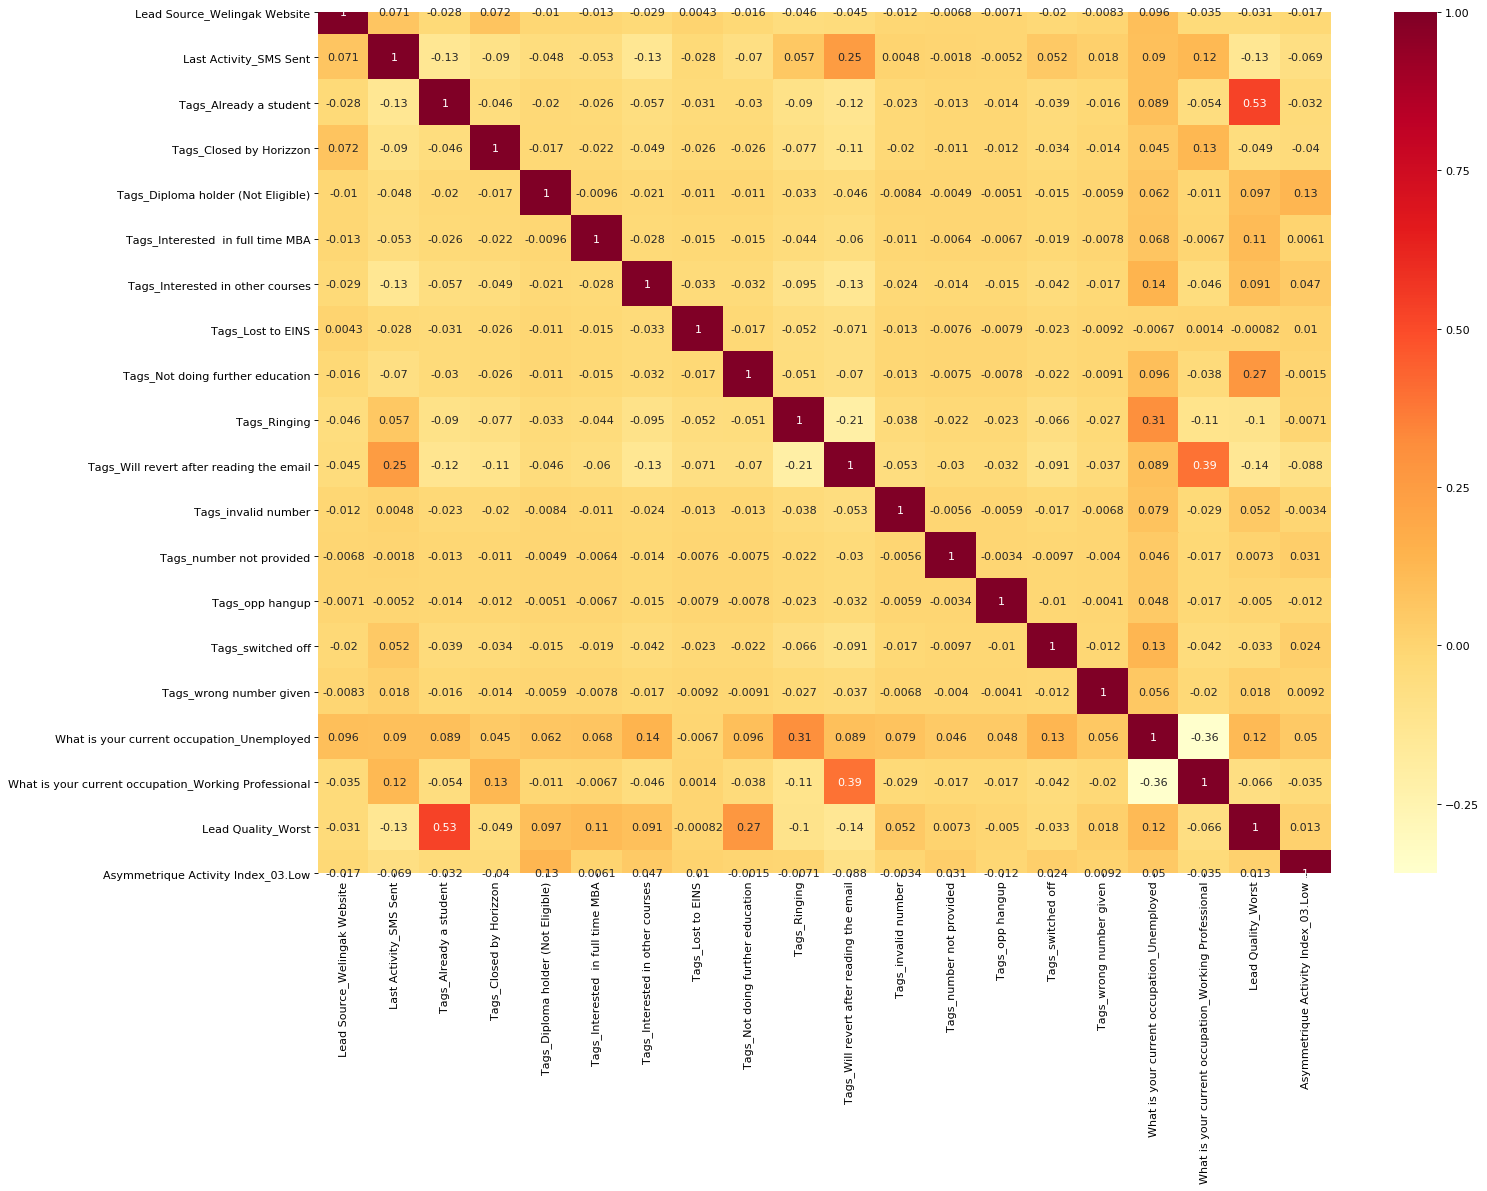

In [ ]:

plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlOrRd")
plt.tight_layout()
plt.show()

#### Variable Dropping and Updating the Model

In [ ]:
#As we can notice some of the variable have high VIF values as well as high p-values. 
# Such variables are insignificant and should be dropped.
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col


Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1369.8
Date:                Mon, 18 Nov 2019   Deviance:                       2739.5
Time:                        18:03:17   Pearson chi2:                 9.93e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5440      0.089    -28.711      0.000      -2.718      -2.370
Lead Source_Welingak Website                             3.0678      0.732      4.189      0.000       1.632       4.503
Last Activity_SMS Sent                                   2.0703      0.110     18.866      0.000       1.855       2.285
Tags_Already a student                                  -4.0245      0.725     -5.549      0.000      -5.446      -2.603
Tags_Closed by Horizzon                                  5.9458      1.010      5.888      0.000       3.967       7.925
Tags_Interested  in full time MBA                       -3.3673      0.745     -4.518      0.000      -4.828      -1.906
Tags_Interested in other courses                        -3.1178      0.327     -9.547      0.000      -3.758      -2.478
Tags_Lost to EINS                                        6.4022      0.793      8.077      0.000       4.849       7.956
Tags_Not doing further education                        -3.9208      1.029     -3.811      0.000      -5.937      -1.904
Tags_Ringing                                            -4.3268      0.231    -18.706      0.000      -4.780      -3.873
Tags_Will revert after reading the email                 3.4672      0.182     19.007      0.000       3.110       3.825
Tags_invalid number                                     -4.5938      1.026     -4.479      0.000      -6.604      -2.583
Tags_number not provided                               -24.8750   2.57e+04     -0.001      0.999   -5.03e+04    5.03e+04
Tags_opp hangup                                         -2.8791      0.785     -3.669      0.000      -4.417      -1.341
Tags_switched off                                       -4.7198      0.522     -9.045      0.000      -5.742      -3.697
Tags_wrong number given                                -25.1520   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
What is your current occupation_Unemployed               2.1661      0.114     18.960      0.000       1.942       2.390
What is your current occupation_Working Professional     2.4538      0.352      6.975      0.000       1.764       3.143
Lead Quality_Worst                                      -2.3256      0.643     -3.618      0.000      -3.585      -1.066
Asymmetrique Activity Index_03.Low                      -2.4410      0.343     -7.118      0.000      -3.113      -1.769
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008971
6795    0.406619
3516    0.008971
8105    0.066953
3934    0.406619
4844    0.995710
3297    0.008971
8071    0.997144
987     0.072828
7423    0.994289
dtype: float64

In [ ]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.008971  , 0.40661869, 0.008971  , 0.06695289, 0.40661869,
       0.99571042, 0.008971  , 0.99714432, 0.07282765, 0.99428852])

In [ ]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.008971,1871
1,0,0.406619,6795
2,0,0.008971,3516
3,0,0.066953,8105
4,0,0.406619,3934


In [ ]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.008971,1871,0
1,0,0.406619,6795,0
2,0,0.008971,3516,0
3,0,0.066953,8105,0
4,0,0.406619,3934,0


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3910   92]
 [ 445 2021]]


In [ ]:
# Predicted   not_churn   churn
# Actual
# not_churn     
# churn 

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9169758812615956


#### Checking VIFs

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
7,Tags_Not doing further education,1.27
13,Tags_switched off,1.20
4,Tags_Interested in full time MBA,1.12
0,Lead Source_Welingak Website,1.08
10,Tags_invalid number,1.08
18,Asymmetrique Activity Index_03.Low,1.06
6,Tags_Lost to EINS,1.05
14,Tags_wrong number given,1.04
12,Tags_opp hangup,1.03


##### Dropping the Variable and Updating the Model
As we can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [ ]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1396.5
Date:                Mon, 18 Nov 2019   Deviance:                       2793.0
Time:                        18:03:27   Pearson chi2:                 9.72e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5232      0.088    -28.812      0.000      -2.695      -2.352
Lead Source_Welingak Website                             3.1769      0.732      4.341      0.000       1.743       4.611
Last Activity_SMS Sent                                   2.0155      0.108     18.731      0.000       1.805       2.226
Tags_Already a student                                  -3.8927      0.724     -5.380      0.000      -5.311      -2.475
Tags_Closed by Horizzon                                  6.0091      1.009      5.954      0.000       4.031       7.987
Tags_Interested  in full time MBA                       -3.2464      0.744     -4.361      0.000      -4.705      -1.787
Tags_Interested in other courses                        -3.0044      0.325     -9.232      0.000      -3.642      -2.367
Tags_Lost to EINS                                        6.4688      0.801      8.079      0.000       4.899       8.038
Tags_Not doing further education                        -3.7815      1.028     -3.680      0.000      -5.796      -1.767
Tags_Ringing                                            -4.1855      0.229    -18.257      0.000      -4.635      -3.736
Tags_Will revert after reading the email                 3.5379      0.181     19.510      0.000       3.182       3.893
Tags_invalid number                                     -4.4487      1.025     -4.340      0.000      -6.458      -2.440
Tags_number not provided                               -23.7356   1.56e+04     -0.002      0.999   -3.06e+04    3.06e+04
Tags_opp hangup                                         -2.7454      0.782     -3.509      0.000      -4.279      -1.212
Tags_switched off                                       -4.5751      0.521     -8.786      0.000      -5.596      -3.554
What is your current occupation_Unemployed               2.0474      0.112     18.287      0.000       1.828       2.267
What is your current occupation_Working Professional     2.3820      0.352      6.768      0.000       1.692       3.072
Lead Quality_Worst                                      -2.5496      0.629     -4.053      0.000      -3.782      -1.317
Asymmetrique Activity Index_03.Low                      -2.4027      0.343     -7.006      0.000      -3.075      -1.731
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009366
6795    0.383248
3516    0.009366
8105    0.066250
3934    0.383248
4844    0.995558
3297    0.009366
8071    0.997179
987     0.074249
7423    0.993804
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00936577, 0.38324765, 0.00936577, 0.0662496 , 0.38324765,
       0.99555792, 0.00936577, 0.99717925, 0.07424879, 0.99380377])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.009366,1871
1,0,0.383248,6795
2,0,0.009366,3516
3,0,0.066250,8105
4,0,0.383248,3934


In [ ]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.009366,1871,0
1,0,0.383248,6795,0
2,0,0.009366,3516,0
3,0,0.066250,8105,0
4,0,0.383248,3934,0


In [ ]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3900  102]
 [ 445 2021]]


In [ ]:
# Predicted not_churn churn
# Actual
# not_churn 3270 365
# churn 579 708

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9154298082869512


#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
7,Tags_Not doing further education,1.27
13,Tags_switched off,1.19
4,Tags_Interested in full time MBA,1.12
0,Lead Source_Welingak Website,1.08
10,Tags_invalid number,1.08
17,Asymmetrique Activity Index_03.Low,1.06
6,Tags_Lost to EINS,1.05
12,Tags_opp hangup,1.03
11,Tags_number not provided,1.02


#### Dropping the Variable and Updating the Model

In [ ]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1410.7
Date:                Mon, 18 Nov 2019   Deviance:                       2821.5
Time:                        18:03:36   Pearson chi2:                 9.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5174      0.087    -28.864      0.000      -2.688      -2.346
Lead Source_Welingak Website                             3.2372      0.732      4.425      0.000       1.803       4.671
Last Activity_SMS Sent                                   1.9977      0.107     18.730      0.000       1.789       2.207
Tags_Already a student                                  -3.8261      0.723     -5.292      0.000      -5.243      -2.409
Tags_Closed by Horizzon                                  6.0487      1.009      5.995      0.000       4.071       8.026
Tags_Interested  in full time MBA                       -3.1839      0.744     -4.279      0.000      -4.642      -1.725
Tags_Interested in other courses                        -2.9432      0.325     -9.057      0.000      -3.580      -2.306
Tags_Lost to EINS                                        6.4968      0.803      8.086      0.000       4.922       8.072
Tags_Not doing further education                        -3.7117      1.027     -3.613      0.000      -5.725      -1.698
Tags_Ringing                                            -4.1145      0.228    -18.019      0.000      -4.562      -3.667
Tags_Will revert after reading the email                 3.5795      0.181     19.801      0.000       3.225       3.934
Tags_invalid number                                     -4.3766      1.025     -4.271      0.000      -6.385      -2.368
Tags_opp hangup                                         -2.6767      0.782     -3.425      0.001      -4.208      -1.145
Tags_switched off                                       -4.5030      0.520     -8.655      0.000      -5.523      -3.483
What is your current occupation_Unemployed               1.9845      0.111     17.901      0.000       1.767       2.202
What is your current occupation_Working Professional     2.3435      0.352      6.656      0.000       1.653       3.034
Lead Quality_Worst                                      -2.6249      0.622     -4.220      0.000      -3.844      -1.406
Asymmetrique Activity Index_03.Low                      -2.3778      0.343     -6.940      0.000      -3.049      -1.706
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009496
6795    0.369841
3516    0.009496
8105    0.066010
3934    0.369841
4844    0.995519
3297    0.009496
8071    0.997198
987     0.074649
7423    0.993595
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00949576, 0.36984099, 0.00949576, 0.06600954, 0.36984099,
       0.99551851, 0.00949576, 0.99719849, 0.07464931, 0.99359534])

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities


y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.009496,1871
1,0,0.369841,6795
2,0,0.009496,3516
3,0,0.066010,8105
4,0,0.369841,3934


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0:

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.009496,1871,0
1,0,0.369841,6795,0
2,0,0.009496,3516,0
3,0,0.066010,8105,0
4,0,0.369841,3934,0


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3895  107]
 [ 445 2021]]


In [ ]:
# Predicted not_churn churn
# Actual
# not_churn 3270 365
# churn 579 708

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9146567717996289


In [ ]:
# Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.28
7,Tags_Not doing further education,1.26
12,Tags_switched off,1.19
4,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.08
10,Tags_invalid number,1.07
16,Asymmetrique Activity Index_03.Low,1.06
6,Tags_Lost to EINS,1.05
11,Tags_opp hangup,1.03
14,What is your current occupation_Working Profes...,0.90


In [ ]:
# Dropping the Variable and Updating the Model

col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1444.2
Date:                Mon, 18 Nov 2019   Deviance:                       2888.4
Time:                        18:03:46   Pearson chi2:                 9.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5055      0.086    -28.989      0.000      -2.675      -2.336
Lead Source_Welingak Website                             3.3910      0.731      4.639      0.000       1.958       4.824
Last Activity_SMS Sent                                   1.9583      0.104     18.756      0.000       1.754       2.163
Tags_Already a student                                  -3.6485      0.722     -5.055      0.000      -5.063      -2.234
Tags_Closed by Horizzon                                  6.1563      1.008      6.106      0.000       4.180       8.133
Tags_Interested  in full time MBA                       -3.0229      0.744     -4.064      0.000      -4.481      -1.565
Tags_Interested in other courses                        -2.7865      0.324     -8.604      0.000      -3.421      -2.152
Tags_Lost to EINS                                        6.6283      0.818      8.107      0.000       5.026       8.231
Tags_Not doing further education                        -3.5285      1.027     -3.437      0.001      -5.541      -1.516
Tags_Ringing                                            -3.9366      0.226    -17.406      0.000      -4.380      -3.493
Tags_Will revert after reading the email                 3.6896      0.180     20.555      0.000       3.338       4.041
Tags_opp hangup                                         -2.5038      0.780     -3.211      0.001      -4.032      -0.976
Tags_switched off                                       -4.3225      0.519     -8.325      0.000      -5.340      -3.305
What is your current occupation_Unemployed               1.8252      0.108     16.869      0.000       1.613       2.037
What is your current occupation_Working Professional     2.2440      0.353      6.362      0.000       1.553       2.935
Lead Quality_Worst                                      -2.9409      0.593     -4.963      0.000      -4.102      -1.779
Asymmetrique Activity Index_03.Low                      -2.3060      0.344     -6.700      0.000      -2.980      -1.631
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009787
6795    0.336203
3516    0.009787
8105    0.065463
3934    0.336203
4844    0.995443
3297    0.009787
8071    0.997254
987     0.075477
7423    0.993089
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00978691, 0.33620324, 0.00978691, 0.06546347, 0.33620324,
       0.99544272, 0.00978691, 0.99725412, 0.07547697, 0.99308851])

In [ ]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.009787,1871
1,0,0.336203,6795
2,0,0.009787,3516
3,0,0.065463,8105
4,0,0.336203,3934


In [ ]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.009787,1871,0
1,0,0.336203,6795,0
2,0,0.009787,3516,0
3,0,0.065463,8105,0
4,0,0.336203,3934,0


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3881  121]
 [ 445 2021]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9124922696351268


In [ ]:
# Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.27
7,Tags_Not doing further education,1.25
11,Tags_switched off,1.18
4,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.07
15,Asymmetrique Activity Index_03.Low,1.06
6,Tags_Lost to EINS,1.05
10,Tags_opp hangup,1.02
13,What is your current occupation_Working Profes...,0.89
14,Lead Quality_Worst,0.69


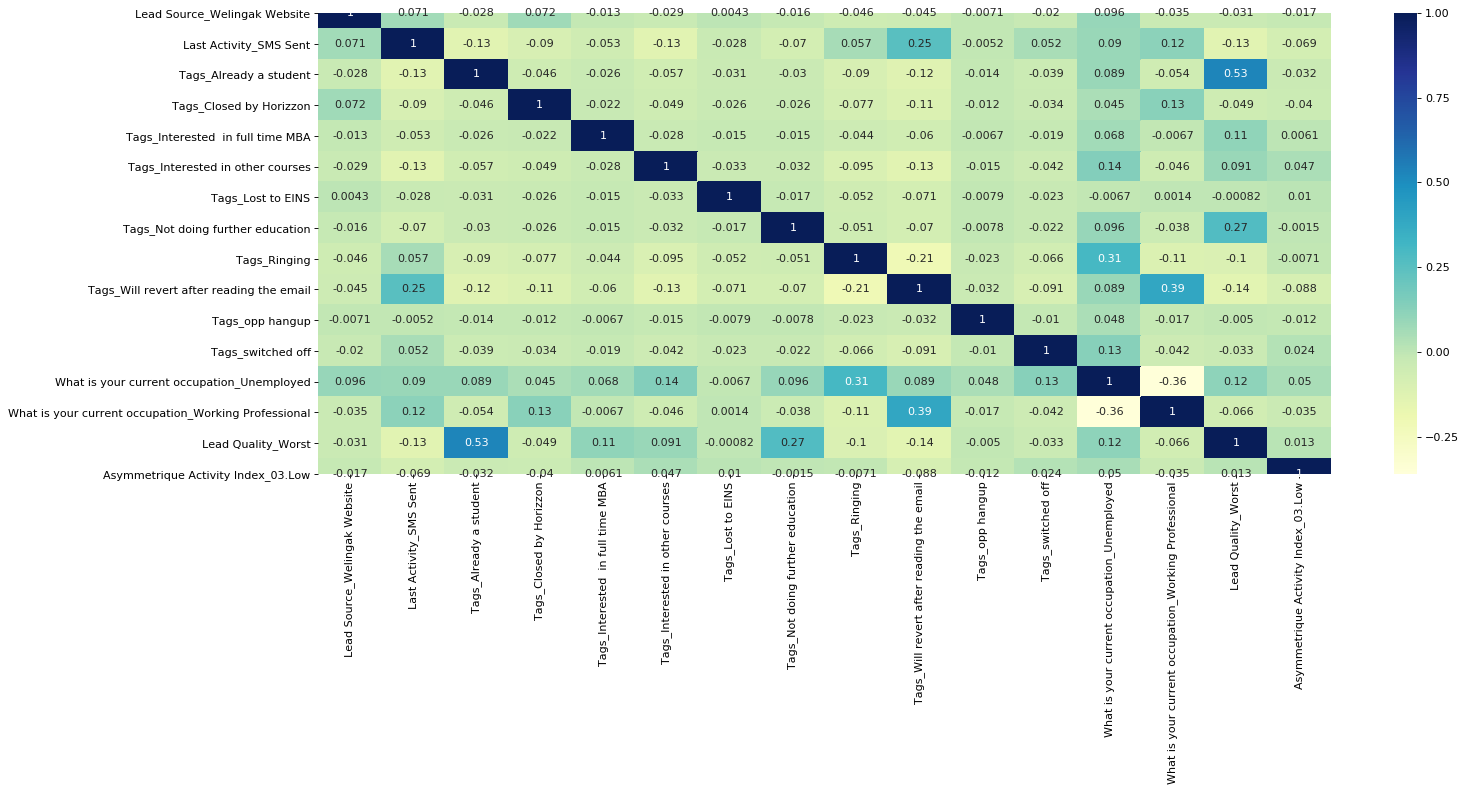

In [ ]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

#### Observations : -
Features of our latest model:
- All variables have p-value < 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from
the heat map.
- The overall accuracy of 0.9125 at a probability threshold of 0.05 is also very acceptable.
##### So, we can proceed with making predictions without dropping any more variables and using this model only.

### Calculating Metrics beyond Accuracy 

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8195458231954582

In [ ]:
# Specificity calculation
TN / float(TN+FP)

0.9697651174412794

In [ ]:
# Calculation of false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03023488255872064


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.9435107376283847


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8971336107258437


### Plotting the ROC Curve

###### An ROC curve demonstrates several things,importants are:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

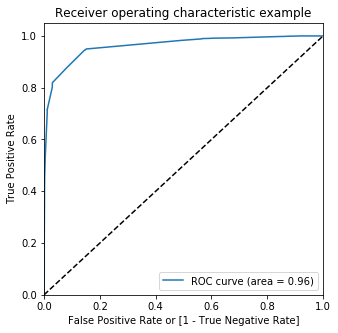

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.49875062e-04, 2.49875062e-04, 2.49875062e-04, 2.49875062e-04,
        4.99750125e-04, 4.99750125e-04, 7.49625187e-04, 7.49625187e-04,
        7.49625187e-04, 1.74912544e-03, 1.74912544e-03, 1.99900050e-03,
        1.99900050e-03, 1.99900050e-03, 1.99900050e-03, 1.99900050e-03,
        3.74812594e-03, 3.74812594e-03, 3.74812594e-03, 1.12443778e-02,
        1.12443778e-02, 1.12443778e-02, 1.12443778e-02, 1.14942529e-02,
        1.14942529e-02, 1.14942529e-02, 2.92353823e-02, 2.97351324e-02,
        2.97351324e-02, 2.97351324e-02, 2.99850075e-02, 2.99850075e-02,
        3.02348826e-02, 3.09845077e-02, 8.44577711e-02, 8.47076462e-02,
        1.45427286e-01, 1.47426287e-01, 1.48675662e-01, 1.48675662e-01,
        1.51424288e-01, 1.53173413e-01, 1.54172914e-01, 1.54672664e-01,
        1.55672164e-01, 1.56671664e-01, 4.93253373e-01, 4.935032

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Calculating the area under the curve(GINI)

In [ ]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

0.9619658439231319

### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Creation of columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
     y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009787,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.336203,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.009787,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.065463,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.336203,3934,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_leads = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_leads.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_leads)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.885591  0.950122  0.845827
0.2   0.2  0.887755  0.946878  0.851324
0.3   0.3  0.889301  0.945661  0.854573
0.4   0.4  0.912492  0.820762  0.969015
0.5   0.5  0.912492  0.819546  0.969765
0.6   0.6  0.912647  0.819546  0.970015
0.7   0.7  0.911874  0.817113  0.970265
0.8   0.8  0.884818  0.716545  0.988506
0.9   0.9  0.884045  0.714517  0.988506


#### Plotting accuracy sensitivity and specificity for various probabilities.

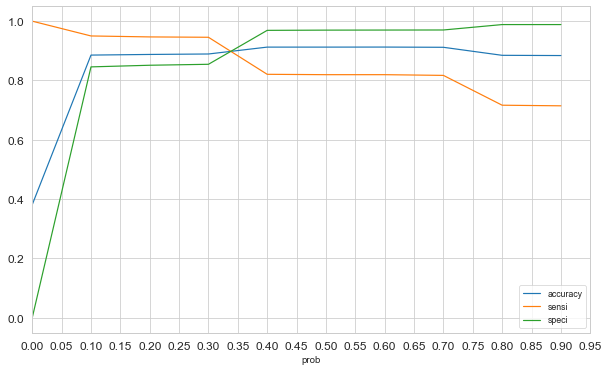

In [ ]:
# Slightly alter the figure size to make it more horizontal.
#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_leads.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

- From the curve above,we see three lines are meeting very close to 0.33 probability value. So 0.33  is taken as the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009787,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.336203,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.009787,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.065463,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.336203,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [ ]:
# Overall accuracy check.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8893011750154607

In [ ]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3420,  582],
       [ 134, 2332]])

In [ ]:
TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [ ]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.9456609894566099

In [ ]:
# Specificity
TN / float(TN+FP)

0.8545727136431784

In [ ]:
# Calculation of false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1454272863568216


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.8002745367192862


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9622960045019696


### Precision and Recall

  Precision
    
  TP / TP + FP

In [ ]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8002745367192862

#### Recall
TP / TP + FN

In [ ]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.9456609894566099

##### Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8002745367192862

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9456609894566099

#### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6463    1
 6464    1
 6465    1
 6466    1
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

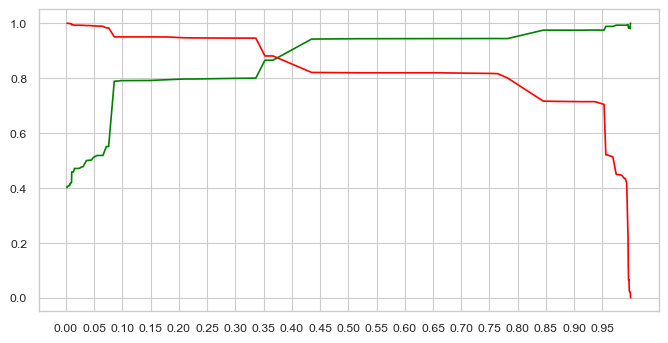

In [ ]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80%.

#### This is already achieved with our earlier threshold value of 0.33. So we will stick to this value.

###  F1 score Calculation: 

F1 = 2×(Precision*Recall)/(Precision+Recall)

In [ ]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.866914498141264

### Making predictions on the test set

Using the scaler function from the train dataset to transfor the test dataset

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,Cit

In [ ]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Worst,Asymmetrique Activity Index_03.Low
4269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7766,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4359,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


##### Adding the constant

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

4269    0.366530
2376    0.993089
7766    0.968573
9199    0.013012
4359    0.952993
9186    0.993089
1631    0.952993
8963    0.952993
8007    0.075477
5324    0.993089
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.366530
2376,0.993089
7766,0.968573
9199,0.013012
4359,0.952993


In [ ]:
# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_leads['LeadID'] = y_test_leads.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_leads and y_pred_1
y_pred_final = pd.concat([y_test_leads, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.366530
1,1,2376,0.993089
2,1,7766,0.968573
3,0,9199,0.013012
4,1,4359,0.952993


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,4269,1,0.366530
1,2376,1,0.993089
2,7766,1,0.968573
3,9199,0,0.013012
4,4359,1,0.952993


In [ ]:
y_pred_final.shape

(2772, 3)

#### Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.366530,1
1,2376,1,0.993089,1
2,7766,1,0.968573,1
3,9199,0,0.013012,0
4,4359,1,0.952993,1


In [ ]:
# Overall accuracy checking.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.8946608946608947

In [ ]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1429  248]
 [  44 1051]]


### Confusion Matrix in Visuals

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

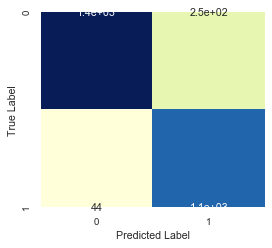

In [ ]:
plt.figure(figsize=(3.5,3.2), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = confusion_test
sns.heatmap(cor, annot=True, cmap="YlGnBu",cbar=False)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

Sensitivity

TP / TP + FN

In [ ]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.9598173515981735

In [ ]:
# Specificity calculation:
TN / float(TN+FP)

0.8521168753726893

False Postive Rate


FP / TN + FP

In [ ]:
print(FP/ float(TN+FP))

0.14788312462731068


Positive Predictive Value

TP / TP + FP

In [ ]:
print (TP / float(TP+FP))

0.8090839107005389


Negative Predictive Value

TN / TN + FN

In [ ]:
print (TN / float(TN+ FN))

0.9701289884589274


Precision

TP / TP + FP

In [ ]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8090839107005389

Recall

TP / TP + FN

In [ ]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.9598173515981735

F1 = 2×(Precision*Recall)/(Precision+Recall)

In [ ]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8780284043441938

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1677
           1       0.81      0.96      0.88      1095

    accuracy                           0.89      2772
   macro avg       0.89      0.91      0.89      2772
weighted avg       0.91      0.89      0.90      2772



Cross Validation Score

To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [ ]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()
print(scores)
print(accuracy)

[0.85590466 0.88852814 0.90800866 0.91017316 0.91883117 0.92207792
 0.92540541 0.92857143 0.93290043 0.93939394]
0.9129794912611816


### Plotting the ROC Curve for Test Dataset

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

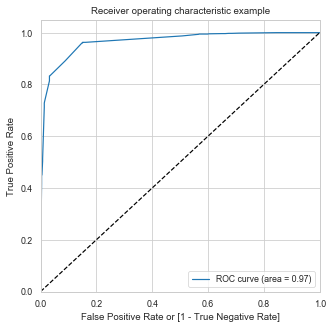

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.96302922e-04,
        1.19260584e-03, 3.57781753e-03, 3.57781753e-03, 3.57781753e-03,
        3.57781753e-03, 4.77042338e-03, 7.15563506e-03, 7.15563506e-03,
        7.15563506e-03, 1.31186643e-02, 1.31186643e-02, 1.31186643e-02,
        1.37149672e-02, 1.37149672e-02, 3.16040549e-02, 3.16040549e-02,
        3.16040549e-02, 3.16040549e-02, 3.27966607e-02, 8.82528324e-02,
        1.47883125e-01, 1.50268336e-01, 1.50268336e-01, 1.50268336e-01,
        1.51460942e-01, 1.55038760e-01, 1.58616577e-01, 1.59809183e-01,
        1.61001789e-01, 5.05664878e-01, 5.06261181e-01, 5.66487776e-01,
        5.67680382e-01, 5.83780561e-01, 5.95706619e-01, 5.99284436e-01,
        6.02265951e-01, 6.49970185e-01, 6.50566488e-01, 6.612999

In [ ]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)


In [ ]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
         AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

0.9662081396710259

#### As a rule of thumb, an AUC can be classed as follows,

 0.90 - 1.00 = excellent    
 0.80 - 0.90 = good    
 0.70 - 0.80 = fair     
 0.60 - 0.70 = poor   
 0.50 - 0.60 = fail   
    
- Since we got a value of 0.9662, our model seems to be doing well on the test dataset.

### Calculating Lead score for the entire dataset

#### Lead Score = 100 * ConversionProbability
This needs to be calculated for all the leads from the original dataset (train + test)

In [ ]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.366530,1
1,2376,1,0.993089,1
2,7766,1,0.968573,1
3,9199,0,0.013012,0
4,4359,1,0.952993,1


In [ ]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009787,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.336203,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.009787,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.065463,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.336203,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [ ]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1871,0,0.009787,0
1,6795,0,0.336203,1
2,3516,0,0.009787,0
3,8105,0,0.065463,0
4,3934,0,0.336203,1


#### Concatenating the train and the test dataset with the Conversion Probabilities

In [ ]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1871,0,0.009787,0
1,6795,0,0.336203,1
2,3516,0,0.009787,0
3,8105,0,0.065463,0
4,3934,0,0.336203,1


In [ ]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [ ]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9240

In [ ]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1871,0,0.009787,0,1
1,6795,0,0.336203,1,34
2,3516,0,0.009787,0,1
3,8105,0,0.065463,0,7
4,3934,0,0.336203,1,34


In [ ]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [ ]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.030273,0,3
1,0,0.009787,0,1
2,1,0.765689,1,77
3,0,0.009787,0,1
4,1,0.952993,1,95


In [ ]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


##### Concatenating the 2 dataframes based on index.

- This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [ ]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.030273,0,3
1,660728,0,0.009787,0,1
2,660727,1,0.765689,1,77
3,660719,0,0.009787,0,1
4,660681,1,0.952993,1,95
5,660680,0,0.075477,0,8
6,660673,1,0.952993,1,95
7,660664,0,0.075477,0,8
8,660624,0,0.075477,0,8
9,660616,0,0.075477,0,8


In [ ]:
# Inspecting the dataframe shape
leads_with_score.shape

(9240, 5)

In [ ]:
# Inspectin if the final dataframe has any null values
total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Conversion_Prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


#### Determining Feature Importance:

Selecting the coefficients of the selected features from our final model excluding the intercept

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            3.39
Last Activity_SMS Sent                                  1.96
Tags_Already a student                                 -3.65
Tags_Closed by Horizzon                                 6.16
Tags_Interested  in full time MBA                      -3.02
Tags_Interested in other courses                       -2.79
Tags_Lost to EINS                                       6.63
Tags_Not doing further education                       -3.53
Tags_Ringing                                           -3.94
Tags_Will revert after reading the email                3.69
Tags_opp hangup                                        -2.50
Tags_switched off                                      -4.32
What is your current occupation_Unemployed              1.83
What is your current occupation_Working Professional    2.24
Lead Quality_Worst                                     -2.94
Asymmetrique Activity Index_03.Low                     -2.31
dtype: float64

##### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [ ]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())

feature_importance

Lead Source_Welingak Website                            51.16
Last Activity_SMS Sent                                  29.54
Tags_Already a student                                 -55.04
Tags_Closed by Horizzon                                 92.88
Tags_Interested  in full time MBA                      -45.61
Tags_Interested in other courses                       -42.04
Tags_Lost to EINS                                      100.00
Tags_Not doing further education                       -53.23
Tags_Ringing                                           -59.39
Tags_Will revert after reading the email                55.66
Tags_opp hangup                                        -37.77
Tags_switched off                                      -65.21
What is your current occupation_Unemployed              27.54
What is your current occupation_Working Professional    33.86
Lead Quality_Worst                                     -44.37
Asymmetrique Activity Index_03.Low                     -34.79
dtype: f

###### Sorting the feature variables based on their relative coefficient values

In [ ]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                            11
Last Activity_SMS Sent                                   8
Tags_Already a student                                   2
Tags_Closed by Horizzon                                  7
Tags_Interested  in full time MBA                        4
Tags_Interested in other courses                        14
Tags_Lost to EINS                                        5
Tags_Not doing further education                        10
Tags_Ringing                                            15
Tags_Will revert after reading the email                12
Tags_opp hangup                                          1
Tags_switched off                                       13
What is your current occupation_Unemployed               0
What is your current occupation_Working Professional     9
Lead Quality_Worst                                       3
Asymmetrique Activity Index_03.Low                       6
dtype: int64

##### Plot showing the feature variables based on their relative coefficient values

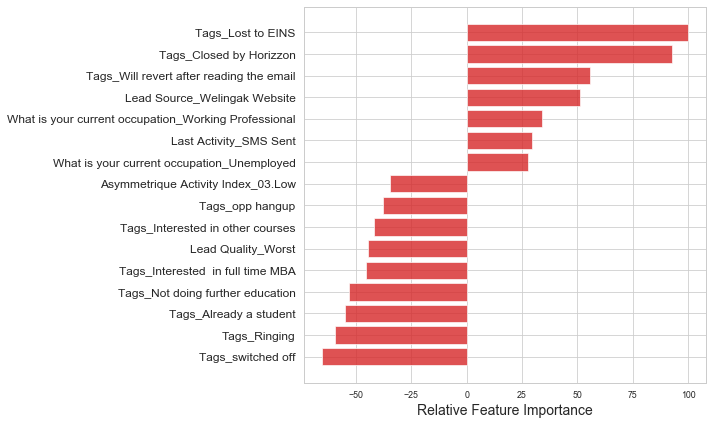

In [ ]:
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

#### Sorted features with respect to 'Relative Feature Importance'

In [ ]:
leads_ri=pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
leads_ri

,index,0
6,Tags_Lost to EINS,100.00
3,Tags_Closed by Horizzon,92.88
9,Tags_Will revert after reading the email,55.66
0,Lead Source_Welingak Website,51.16
13,What is your current occupation_Working Profes...,33.86
1,Last Activity_SMS Sent,29.54
12,What is your current occupation_Unemployed,27.54
15,Asymmetrique Activity Index_03.Low,-34.79
10,Tags_opp hangup,-37.77
5,Tags_Interested in other courses,-42.04


#### Selecting Top 4 features which contribute most towards the probability of a lead getting converted:

In [ ]:
leads_ri.head(4)

,index,0
6,Tags_Lost to EINS,100.00
3,Tags_Closed by Horizzon,92.88
9,Tags_Will revert after reading the email,55.66
0,Lead Source_Welingak Website,51.16


### Conclusion

#### After trying several models, we finally chose a model with the following characteristics:
- All variables have p-value < 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
- The overall accuracy of 0.9056 at a probability threshold of 0.33 on the test dataset is also very acceptable.

###### Model  predicted following values of the dependent variables for respective  threshold values of Conversion probability:

In [ ]:
# Dataset Threshhold value    Accuracy   Sensitivity      Specificity   False Postive Rate     Positive         Negative
#                                                                                         predictive value  Predictive Value

# train      0.5               0.9124        0.8195           0.9698           0.03023           0.9435             0.8971

# train      0.33              0.8893        0.9456           0.8545           0.1454            0.8002             0.9622

# test       0.33              0.8946        0.9598           0.8521           0.1478            0.8090             0.9701


#### Based on our model, some features are identified which contribute most to a Lead getting converted successfully.
-  The conversion probability of a lead increases with increase in values of the following features in descending order:
    

Tags_Lost to EINS

Tags_Closed by Horizzon

Tags_Will revert after reading the email

Lead Source_Welingak Website

What is your current occupation_Working Profes...

Last Activity_SMS Sent

What is your current occupation_Unemployed



- The conversion probability of a lead increases with decrease in values of the following features in descending order

Tags_switched off

Tags_Ringing

Tags_Already a student

Tags_Not doing further education

Tags_Interested in full time MBA

Lead Quality_Worst

Tags_Interested in other courses

Tags_opp hangup

Asymmetrique Activity Index_03.Low

-  Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will
decrease or increase the Sensitivity and increase or decrease the Specificity of the model
-  From High Sensitivity  we get that almost all leads who are likely to Convert are correctly predicted.
-  From High Specificity  we get that leads that are on the brink of the probability of getting Converted or not are not selected.